In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
stocks = pd.read_csv('data/stocks.csv')
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
print("number of days:", len(stocks))

number of days: 619040


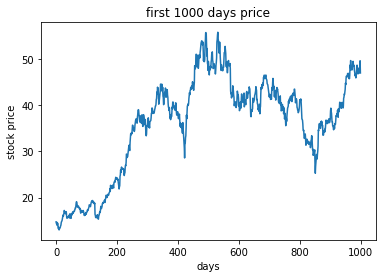

In [8]:
plt.plot(np.arange(1000), stocks['close'][:1000])
plt.xlabel('days')
plt.ylabel('stock price')
plt.title('first 1000 days price')
plt.show()

In [9]:
sequence_len = 100
total_len = len(stocks)

In [10]:
def get_data(split):
    
    features = []
    labels = []
    
    for i in range(0, total_len-sequence_len):
        x = stocks['close'][i:i+sequence_len]
        y = stocks['close'][i+sequence_len]
        x = x.values.reshape((sequence_len,1))
        features.append(x)
        labels.append(y)
    
    features = np.array(features)
    labels = np.array(labels)
    size_train = int(len(features)*(1-split))
    size_test = int(len(features)*split)
    return features[:size_train], labels[:size_train], features[-size_test:], labels[-size_test:]

In [11]:
split = .002
x_train, y_train, x_test, y_test = get_data(split)
print("training size:", len(x_train), "testing size:", len(x_test))

training size: 617702 testing size: 1237


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(sequence_len,1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(100, return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam')

In [14]:
model.fit(x_train, y_train, batch_size=64, epochs=1, shuffle=True)

Epoch 1/1
  8832/617702 [..............................] - ETA: 36:03 - loss: 13607.7743

KeyboardInterrupt: 

In [13]:
pred = model.predict(x_test)

In [14]:
pred.shape, y_test.shape

((1237, 1), (1237,))

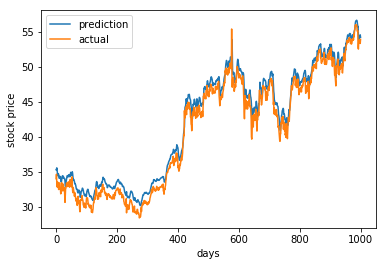

In [24]:
days = 1000
x = np.arange(days)
plt.plot(x, pred[:days])
plt.plot(x, y_test[:days])
plt.xlabel('days')
plt.ylabel('stock price')
plt.legend(['prediction', 'actual'])
plt.show()

In [20]:
a = [1, 3]
a= [str(i) for i in a]

In [21]:
sorted(a)

['1', '3']

In [24]:
import math

math.ceil(3.001)

4

In [25]:
def fun(a):
    
    if len(a)==4:
        return a
    a += '2'
    return fun(a)

In [27]:
fun('5')

'5222'